# Airlines Passenger Forecasting

Develop a model to predict the number of international airline passengers in units of 1,000

--Hemansh Anand

**Steps :**

* Introduction
* Loading and Indexing the Dataset
* Checking if the data is stationary or not ( It should have constant Mean - Variance - Std)
* Converting data into stationary
* Creating the ARIMA model

Time Series Data is a collection of observations recorded over an equal time interval. 

Componenents of Time Series Data are - 

1. Seasonality - Repititive patterns observed over a specific time period, lets say a day, week or even months.
2. Trend - Upward or Downward movement of Data.
3. Noise - Randomness in the dataset.
4. Cyclic - Changes in the Time Series Data because of economicboom and bust.

Stationarity - Distribution of data is invariant (not change) with respect to time. 
Trend & Seasonality contribute to Non Stationarity.

For a Time Series Data to be modelled it ought to be Stationary as if the features are internally correlated and differ with time, they result in vague regression analysis.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


Loading the Dataset

In [ ]:
df = pd.read_csv('../input/air-passengers/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The dataset is time series having columns Months and No. of Passengers. Now we will play with the basic pandas function to know more about the dataset.

In [ ]:
df.shape

(144, 2)

In [ ]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


We don't have any missing values

In [ ]:
from datetime import datetime

Converting date string to datetime data type

In [ ]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)

As you can see, I have changed the data type now

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Setting the index as date so that we can access and traverse values easily, do a substring search and brownie points to the fact that it can help us to visualise easily.

In [ ]:
index = df.set_index('Month',inplace=False)

In [ ]:
index.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualising the Passengers

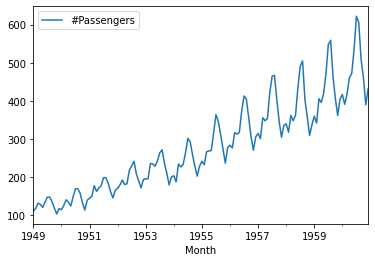

In [ ]:
index.plot()

Typing "#Passengers" seems really annoying so I'll just rename it, Hehe.

In [ ]:
index.rename(columns={'#Passengers':'Passengers'},inplace=True)

# Checking if the data is stationary

So basically you can adopt any of these ways -> plot the rooling mean or rolling std to check if the change in mean is constant or not -> ADCF Test -> KPSS Test

For a better explanation and your clarity, I will skim you through each of them..

In [ ]:
simple_ma = index['Passengers'].rolling(window=12).mean()
simple_std = index['Passengers'].rolling(window=12).std()

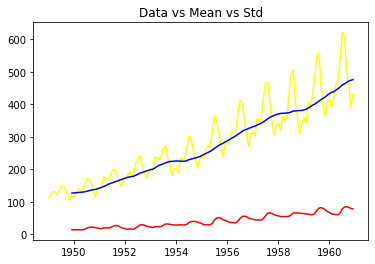

In [ ]:
plt.title('Data vs Mean vs Std')
plt.plot(index,color='yellow')
plt.plot(simple_ma, color='blue')
plt.plot(simple_std,color='red')

Trend in the dataset can evidently be seen

Conducting the ADCF ie Augmented Dickey Fuller Test. Having the Null Hypothesis to be Time Series is Non Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(index['Passengers'])
df_test

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

Output shows the follwoing : Test Statistic 0.81 p-value 0.99 #Lags Used 13 No. of Observation Used 130 followed by Critical Values at various percentages.

For Data to be stationary p value should be < 0.05 and critical values should be close to Test Statistics. Therefore, ADCF test concludes that data is NOT Stationary

Still y'all have a doubt whether Data is stationary or not? Don't worry. Just for your validation, I will conduct another test! That being the KPSS Test



In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(index['Passengers'],'ct')
kpss_test

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


(0.1627365740582311,
 0.03605285495147407,
 14,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Output shows the follwoing : Test Statistic 0.16 p-value 0.03 #Lags Used 14 followed by Critical Values at various percentages.

For Data to not be stationary p value should be < 0.05 and Null Hypothesis should be rejected. Therefore, KPSS test also concludes that data is NOT Stationary

# Transforming Data to Achieve Stationarity


Now that we've established that data is non stationary we need to change it to Stationary. 
This can be done via : Differencing or Transformations.

We will perform Log Sacle Transfomation Plus Two Level Differencing

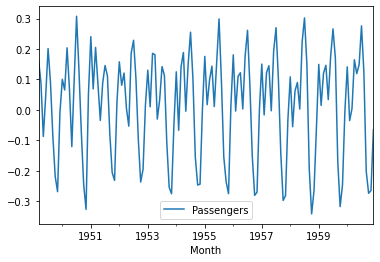

In [ ]:
index_log = np.log(index)
index_log = index_log - index_log.shift(2)
index_log.dropna(inplace=True)
index_log.plot()

In [ ]:
df_test_log = adfuller(index_log['Passengers'])
df_test_log

(-3.1679073752887454,
 0.021919114564038708,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -431.93712963284486)

After concluding the results from ADFC TEST, p-value has reduced from 0.99 to 0.02 AND critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus,we can say that our given series is stationary.

# ARIMA MODEL CREATION 

ARIMA MODEL = AR (AutoRegressive Term - p) + I (Integrated - d) + MA (Moving Average - q)

**Plotting the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to find out the value of p & q term**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

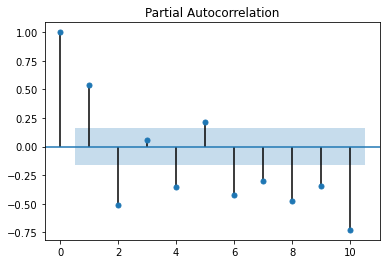

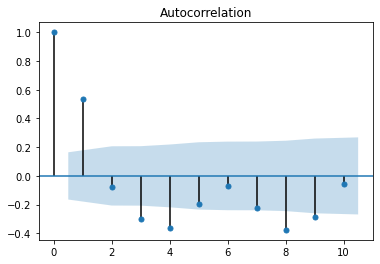

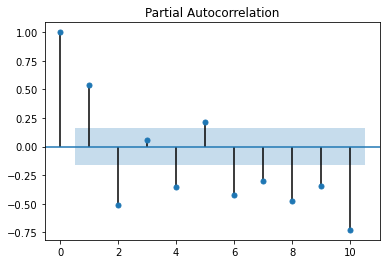

In [ ]:
plot_acf(index_log,lags=10,alpha=0.05)
plot_pacf(index_log,lags=10,alpha=0.05)

In both the plots, the value cuts of at Lag 2.

**Therefore, final order of terms for ARIMA Model for respective p,d,q are (2,2,2)**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(index_log , order = (2,2,2))
results = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Model Evaluation

In [ ]:
residuals = results.resid
mean_absolute_error_perc = np.mean(np.abs(residuals)) * 100
print("Value of Mean Absolute Error is : ",mean_absolute_error_perc," %")

Value of Mean Absolute Error is :  10.053086885882758  %


Mean Absolute Error of 10% tells us that we have done a fairly nice job.